# Module 7. Time series analysis Lab 2 

In [ ]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

### Exercise 1

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

First Create a time series chart of the data.

In [ ]:
data.plot(y=['Houses Sold'], figsize=[10,5])

Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

In [ ]:
data['SMA3_Forecast'] = data['Houses Sold'].rolling(
    3).mean().shift(1)
data['SMA6_Forecast'] = data['Houses Sold'].rolling(
    6).mean().shift(1)
data['SMA12_Forecast'] = data['Houses Sold'].rolling(
    12).mean().shift(1)

data.head()


Add predictions for Simple Exponential Smooting to the dataframe.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
data_ses = SimpleExpSmoothing(
    data['Houses Sold']).fit(smoothing_level=0.4, optimized=True)
data['SES'] = data_ses.fittedvalues
data.head()
# Kan ook geplot worden
# data.plot(y=['Houses Sold',  'SES'], figsize=[10, 5])


Add predictions for Double Exponential Smoothing to the dataframe.

In [ ]:
from statsmodels.tsa.api import Holt

data_des = Holt(data['Houses Sold']).fit(smoothing_level=.2, smoothing_trend=.2)

data['DES'] = data_des.fittedvalues
data.head()
# data.plot(y=['Houses Sold',  'DES'], figsize=[10,5])

Calculate the MAE to find the best model. First drop the rows with NaN.

In [ ]:
data.plot(y=['Houses Sold','SMA3_Forecast', 'SMA6_Forecast', 'SMA12_Forecast', 'SES', 'DES'], figsize=[10,5])
# Sabine ging MAE niet doen in deze oefening.

In [ ]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']

## Exercise 2

You have been assigned to forecast the number of aircraft engines ordered each month from an engine manufacturing company. At the end of February, the
forecast is that 100 engines will be ordered during April.
Then during March, 120 engines are actually ordered.  
Using $\alpha$ = 0.3, determine a forecast (at the end of March) for the number of orders placed during April and during May. Use simple exponential
smoothing.  
These are the appropriate formulae

$X_t = \alpha x_t + (1 - \alpha) X_{t-1}$

$F_{t+m} = X_t$

In [ ]:
"""
t     --> einde Maart
t - 1 --> einde Februari
t + 1 --> einde april 
"""

# Waarde van alpha
alpha = 0.3
# Eind waarde van Maart
x_t = 120
# Eind waarde van Februari
X_t_min_1 = 100


X_t = alpha * x_t + (1 - alpha) * X_t_min_1

print(X_t)

## Exercise 3

An automobile dealer is using Holt's method to
forecast weekly car sales. Currently, the level is
estimated to be 50 cars per week, and the trend is
estimated to be six cars per week. During the current
week, 30 cars are sold. After observing the current
week's sales, forecast the number of cars three weeks
from now. Use $α = $β = 0.3.

These are the appropriate formulae

$X_{t} = \alpha x_{t} + (1-\alpha)(X_{t-1} + b_{t-1})$

$b_{t} = \beta(X_{t}-X_{t-1}) + (1-\beta)b_{t-1}$

$F_{t+m} = X_t + mb_t$

In [ ]:
alpha = 0.3
beta = 0.3
x_t = 30
X_t_min_1 = 50
b_t_min_1 = 6

X_t = alpha * x_t + (1 - alpha) * (X_t_min_1 + b_t_min_1)
print(f"X_t: {X_t}")

b_t = beta * (X_t - X_t_min_1) + (1 - beta) * b_t_min_1
print(f"b_t: {b_t}")


F_t_plus_m = X_t + 3 * b_t
print(f"F_t_plus_m: {F_t_plus_m}")


### Exercise 4

Consider the airline ticket data in the file airline ticket data.csv  
- Create a time series chart of the data. Based on what
you see, which of the exponential smoothing models
do you think should be used for forecasting? Why?
- Create and train the model. Predict the values for the next 12 months.
- Create a plot with the airline ticket data, the fitted values and the predicted values for the next 12 months.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/airline%20ticket%20data.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

In [ ]:
# Data plotten om te zien wat er allemaal gebeurd
data.plot(y=['Tickets'], figsize=[10,5])

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

train = data.Tickets

model = ExponentialSmoothing(train,
                                  trend='add', seasonal='add',
                                  seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')

In [ ]:
# Model van triple exponential voor vergelijking met predicted
train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')

# Predicted plot
predicted = model.forecast(12)
predicted.plot(legend=True, label='predicted')


### Exercise 5

The file US Retail.csv contains monthly retail sales of
beer, wine, and liquor at U.S. liquor stores.
- Is seasonality present in these data?
- Create a time series chart of the data. Based on what
you see, which of the exponential smoothing models
do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [179]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


In [ ]:
data.plot(y=['Total Sales'], figsize=[10,5])

<Axes: xlabel='Month'>

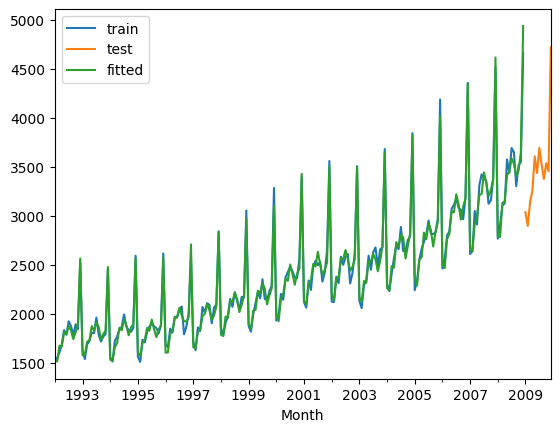

In [180]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Alles behalve de laaste 12 values
train = data['Total Sales'][:-12]
test = data['Total Sales'][-12:]

model = ExponentialSmoothing(train,
                             trend='add', seasonal='multiplicative',
                                  seasonal_periods=12, freq='MS').fit()

train.plot(legend=True, label='train')
test.plot(legend=True, label='test')
model.fittedvalues.plot(legend=True, label='fitted')


Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

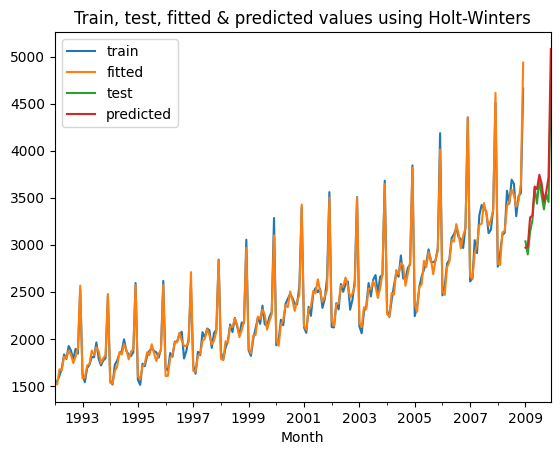

In [181]:
predicted = model.forecast(12)

train.plot(legend=True, label='train')
model.fittedvalues.plot(legend=True, label='fitted')

test.plot(legend=True, label='test')
predicted.plot(legend=True, label='predicted')

plt.title('Train, test, fitted & predicted values using Holt-Winters')

In [182]:
from sklearn.metrics import mean_absolute_error

print(f'MAE = {mean_absolute_error(test,predicted)}')


MAE = 119.71792951482212


## Source
Business Analytics Data Analysis & Decision Making 